# Decision tree classifier

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

To start, we will create a simple dataset to illustrate how classification works and we render it. The example is slightly different from the one in the slides as sk-learn Decision tree classifier doesn't support categorical variable.

In [179]:
X = pd.DataFrame([['2','3','mango'],
                    ['3','3','mango'],
                    ['1','1','grape'],
                    ['1','1','grape'],
                    ['3','3','lemon']], columns=['weight','diameter','label'])
X.style

,weight,diameter,label
0,2,3,mango
1,3,3,mango
2,1,1,grape
3,1,1,grape
4,3,3,lemon


We want to create a decision tree to know what of fruit we have based only on the colour and the diameter.

In [180]:
# importing the decision tree classifier algorithm function from sklearn
from sklearn.tree import DecisionTreeClassifier
# we create the decision tree classifier model
# random_state is used to fix the randomness and obtain the same result every time
decision_tree = DecisionTreeClassifier(random_state=4242)
# we create the tree based on our dataset
# we give it all the columns except the last one as data, and the last as label
decision_tree.fit(X[X.columns[:-1]], X['label'])

DecisionTreeClassifier(random_state=4242)

The tree has been built now. Before displaying it, let's take a look at some attribute of the classifier. We can obtain some information from them, like how important in the classification process each feature are. We can also get some information about the shape of our tree.

In [181]:
print(decision_tree.feature_importances_)
print(decision_tree.get_depth())
print(decision_tree.get_n_leaves())

[0.15151515 0.84848485]
2
3


Now, let's visualise our decision tree. It is easy because scikit-learn come with a function for that, so we don't have to make it ourselves like we had to with the dendrogram last time.



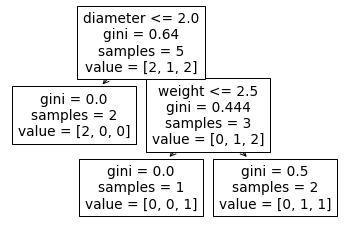

In [182]:
# import the function to plot tree and use it
from sklearn.tree import plot_tree
plot_tree(decision_tree, feature_names=X.columns)
plt.show()

We can now use our decision tree to classify other fruit. Le's try first to apply it to our data. We can observe that one of the mango was misclassified, as it goes into the last node on the right.

In [183]:
print('label     :', X['label'].to_numpy())
print('prediction:', decision_tree.predict(X[X.columns[:-1]]))
print('accuracy  :', decision_tree.score(X[X.columns[:-1]], X['label']))

label     : ['mango' 'mango' 'grape' 'grape' 'lemon']
prediction: ['mango' 'lemon' 'grape' 'grape' 'lemon']
accuracy  : 0.8


Let's try to classify other fruit now. We create some by tweaking a bit our original fruit.

In [184]:
X2 = pd.DataFrame([['2.5','2','mango'],
                    ['2.9','3.3','mango'],
                    ['1.3','1','grape'],
                    ['1','1.6','grape'],
                    ['3.1','2.6','lemon']], columns=['weight','diameter','label'])
X2.style

,weight,diameter,label
0,2.5,2,mango
1,2.9,3.3,mango
2,1.3,1,grape
3,1,1.6,grape
4,3.1,2.6,lemon


And now we classify those new fruits

In [185]:
print('label     :', X2['label'].to_numpy())
print('prediction:', decision_tree.predict(X2[X2.columns[:-1]]))
print('accuracy  :', decision_tree.score(X2[X2.columns[:-1]], X2['label']))

label     : ['mango' 'mango' 'grape' 'grape' 'lemon']
prediction: ['grape' 'lemon' 'grape' 'grape' 'lemon']
accuracy  : 0.6


We have some misclassified fruit. To ascert the certainty of our model, we can ask the tree to give us the probability for each classification.

In [186]:
pd.DataFrame(decision_tree.predict_proba(X2[X2.columns[:-1]]), columns=decision_tree.classes_)

,grape,lemon,mango
0,1.0,0.0,0.0
1,0.0,0.5,0.5
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.5,0.5


## Using a dataset

We are now familiar with the method, so we can apply it on a big dataset. We will import the iris dataset.

In [204]:
from sklearn.datasets import load_iris
iris = load_iris()
dataset = pd.DataFrame(iris.data, columns=iris.feature_names)

Let's visualise the first 9 rows

In [212]:
# We can visualise the dataset
dataset[:9].style

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.100000,3.500000,1.400000,0.200000
1,4.900000,3.000000,1.400000,0.200000
2,4.700000,3.200000,1.300000,0.200000
3,4.600000,3.100000,1.500000,0.200000
4,5.000000,3.600000,1.400000,0.200000
5,5.400000,3.900000,1.700000,0.400000
6,4.600000,3.400000,1.400000,0.300000
7,5.000000,3.400000,1.500000,0.200000
8,4.400000,2.900000,1.400000,0.200000


In [213]:
# we create the decision tree classifier model
# random_state is used to fix the randomness and obtain the same result every time
decision_tree = DecisionTreeClassifier(random_state=4242)
# we create the tree based on our dataset
# we give it all the columns except the last one as data, and the last as label
decision_tree.fit(dataset, iris.target)

DecisionTreeClassifier(random_state=4242)

In [214]:
print(decision_tree.feature_importances_)
print(decision_tree.get_depth())
print(decision_tree.get_n_leaves())

[0.01333333 0.         0.06405596 0.92261071]
5
9


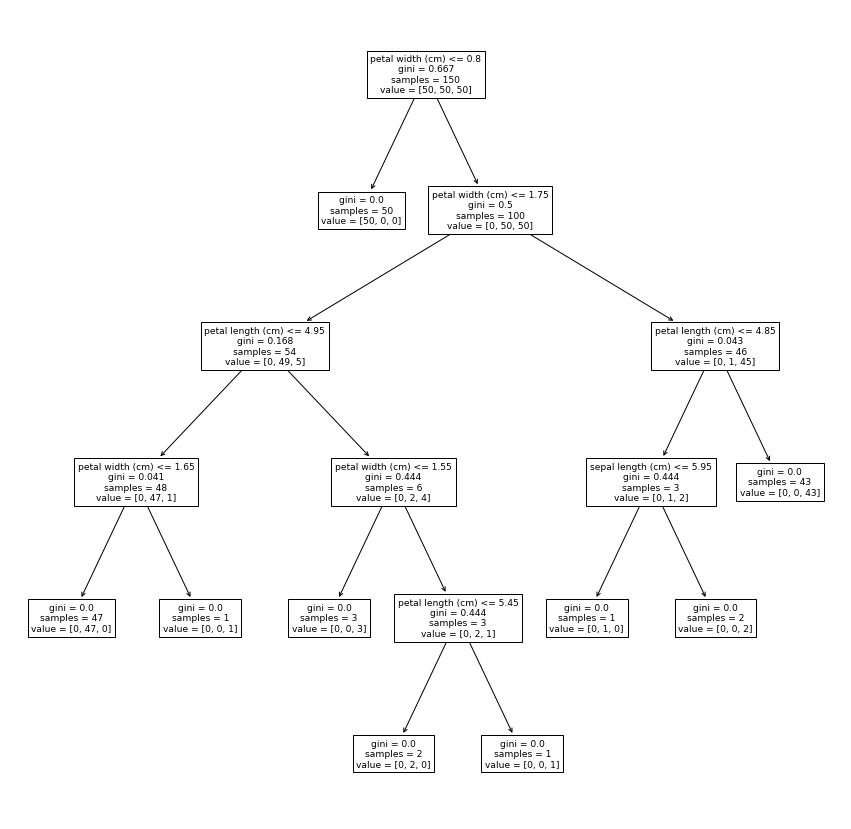

In [221]:
# import the function to plot tree and use it
plt.figure(figsize=(15,15))
plot_tree(decision_tree, feature_names=dataset.columns)
plt.show()